# Tuned BI-LSTM Model

This notebook aims to tune the BiLSTM model by optimizing hyperparameters and regularization techniques as per the inferences drawn from previous experiments to improve generalization

<!-- -- -->

In [17]:
import numpy as np
import os 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


import pickle

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
ARTIFACTS_PATH = "../artifacts"

In [3]:
VOCAB_SIZE = 5000 
MAX_LEN = 200
NUM_CLASSES = 5

LOADING ARTIFACTS

In [4]:
def load_padded_sequences():
    X_train_pad = np.load(os.path.join(ARTIFACTS_PATH, "X_train_pad.npy"))
    X_test_pad = np.load(os.path.join(ARTIFACTS_PATH, "X_test_pad.npy"))

    return X_train_pad, X_test_pad


def load_labels():
    y_train = np.load(os.path.join(ARTIFACTS_PATH, "y_train.npy"))
    y_test = np.load(os.path.join(ARTIFACTS_PATH, "y_test.npy"))

    return y_train, y_test



X_train_pad , X_test_pad = load_padded_sequences()
y_train, y_test = load_labels()


In [5]:
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_pad shape: {X_test_pad.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_pad shape: (1701, 200)
y_train shape: (1701,)
X_test_pad shape: (426, 200)
y_test shape: (426,)


In [6]:
with open("/Users/sarthaksharna/AutoNews/artifacts/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

<!-- -- -->

THE MODEL ARCHITECTURE

In [ ]:
def create_tuned_bilstm_model():
    """
    This function tunes the BI-LSTM model by adding hyperparameters like SpatialDrouput1D,Bidirectional LSTM layers and reducing LSTM units
    """
    
    model = Sequential([
    # Embedding with spatial dropout
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=VOCAB_SIZE, output_dim=128),
    SpatialDropout1D(0.2),
    
    # Bidirectional LSTM
    Bidirectional(LSTM(64, return_sequences=False)),
    
    # Regularization
    Dropout(0.5),
    
    # Output
    Dense(NUM_CLASSES, activation='softmax')
])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [8]:
model = create_tuned_bilstm_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739,461 (2.82 MB)

 Trainable params: 739,461 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights = True)

history = model.fit(
    X_train_pad,
    y_train,
    epochs=30,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stopping]
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3380 - loss: 1.5402 - val_accuracy: 0.3545 - val_loss: 1.4942
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6249 - loss: 1.0929 - val_accuracy: 0.7958 - val_loss: 0.6808
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8848 - loss: 0.4288 - val_accuracy: 0.8357 - val_loss: 0.4921
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.9547 - loss: 0.2142 - val_accuracy: 0.9178 - val_loss: 0.2695
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9818 - loss: 0.1089 - val_accuracy: 0.9249 - val_loss: 0.2550
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9929 - loss: 0.0445 - val_accuracy: 0.9343 - val_loss: 0.2691
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9871 - loss: 0.0540 - val_accuracy: 0.9319 - val_loss: 0.2212
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9976 - loss: 0.0205 - val_accuracy: 0.94

In [10]:
def evaluate_bilstm_tuned_model(model, X_test, y_test, label_encoder):
    # Keras evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_classes))


evaluate_bilstm_tuned_model(model, X_test_pad, y_test, le)



Test Loss: 0.1576
Test Accuracy: 0.9460
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.95      0.95       101
entertainment       0.93      0.93      0.93        74
     politics       0.97      0.90      0.94        81
        sport       0.95      1.00      0.98       101
         tech       0.93      0.93      0.93        69

     accuracy                           0.95       426
    macro avg       0.95      0.94      0.94       426
 weighted avg       0.95      0.95      0.95       426


Confusion Matrix:
[[ 96   1   2   1   1]
 [  2  69   0   1   2]
 [  4   0  73   2   2]
 [  0   0   0 101   0]
 [  0   4   0   1  64]]


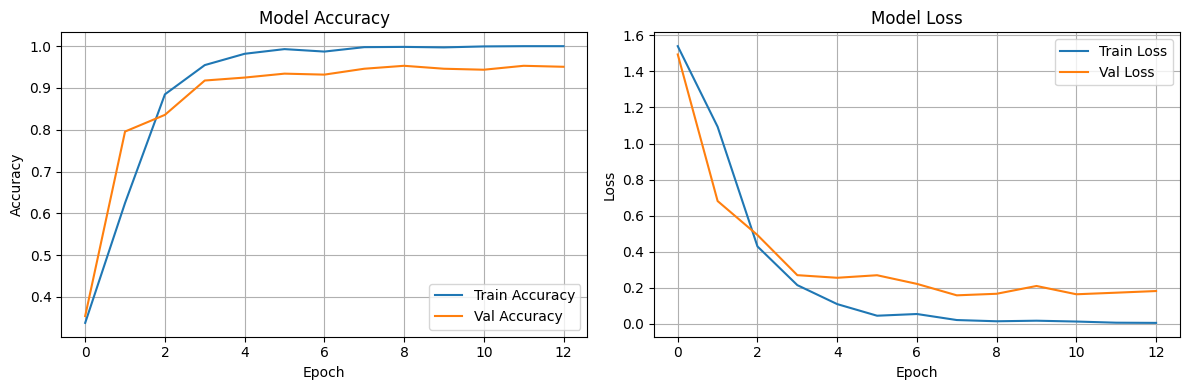

In [11]:
# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<!-- -- -->

In [14]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print("Final Train Acc:", train_acc)
print("Final Val Acc:", val_acc)


Final Train Acc: 1.0
Final Val Acc: 0.9507042169570923


In [15]:
best_val_acc = max(history.history['val_accuracy'])
print("Best Val Accuracy:", best_val_acc)


Best Val Accuracy: 0.9530516266822815


In [ ]:
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
print("Best Epoch:", best_epoch)

Best Epoch: 9


<!-- -- -->

Saving the model

In [ ]:
model.save(os.path.join(ARTIFACTS_PATH, "bilstm_tuned_model.keras")) 

<!-- -- -->

INFERENCE:

The BiLSTM model augmented with SpatialDropout1D demonstrates strong and stable performance, achieving a test accuracy of ~94.6% with consistently high precision, recall, and F1-scores across all classes.

Compared to previous variants, the training and validation curves are noticeably smoother, indicating improved learning stability and reduced sensitivity to noise.

The introduction of SpatialDropout1D effectively mitigates overfitting by regularizing entire feature maps rather than individual neurons, which is particularly beneficial for sequence models. Additionally, reducing the number of LSTM units appears to have improved generalization, likely because the dataset is relatively small and a lower-capacity model is less prone to memorization.

We can explore incorporating a self-attention layer on top of the BiLSTM to better capture long-range dependencies and salient tokens, which may further improve classification performance and interpretability.